<a href="https://colab.research.google.com/github/Alpha-Male-Dennis/4792_Data-Mining-Group-18/blob/main/CSC_4792_Project_G18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Business Understanding

## Problem Statement

The Journal of Natural and Applied Sciences (JONAS) publishes multidisciplinary research articles across various disciplines, including environmental science, agriculture, mining, engineering, and water resources. Manually categorizing these articles into their respective disciplines based on titles and abstracts is time-consuming and subjective. An automated classification model is needed to accurately assign articles to their relevant disciplines using natural language processing (NLP) and machine learning techniques.

## Business Objectives

The primary business objectives are:

1. Efficient Article Classification – Automate the categorization of journal articles to streamline editorial workflows.
2. Improved Discoverability – Enhance search and retrieval of articles by discipline for researchers and readers.
3. Reduced Manual Effort – Minimize the need for manual tagging by editors, reducing human error and workload.

## Success Criteria
* The model should correctly classify articles into predefined disciplines with high accuracy.
* The solution should be scalable to handle new articles as the journal continues publishing.
* The classification system should be interpretable, allowing editors to verify and adjust categories if needed.

## Data Mining Goals

* Text Preprocessing – Clean and preprocess article titles and abstracts (tokenization, stopword removal, stemming/lemmatization).
* Feature Extraction – Convert text into numerical features using techniques like TF-IDF or word embeddings (Word2Vec, GloVe).
* Model Development – Implement a supervised classification model (e.g., Naïve Bayes, SVM, Random Forest, or Neural Networks) to predict article disciplines.
* Evaluation – Assess model performance using metrics such as accuracy, precision, recall, and F1-score.

## Initial Project Success Criteria

* Accuracy: The model should achieve at least 85% accuracy in classifying articles into the correct discipline.
* Interpretability: The model should provide explainable predictions (e.g., feature importance in decision-making).
* Scalability: The solution should handle new, unseen articles without significant performance degradation.

# 2. Data Understanding

## First mount drive

# New Section

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 2.1 Load Raw Dataset

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/JONAS dataset/journal_articles_final.csv')
print("Dataset loaded successfully!")

Dataset loaded successfully!


## 2.2 Initial Data Exploration

### Inspection

In [ ]:
# Display the first 5 rows
print("First 5 rows:")
display(df.head())

# Dataset shape (number of articles, columns)
print("\nDataset shape:", df.shape)

# Column names and data types
print("\nData types and non-null counts:")
display(df.info())

# Summary statistics for numerical columns (if any)
print("\nSummary statistics:")
display(df.describe(include='all'))

First 5 rows:


,article_id,title,abstract,keywords,discipline,year,volume
0,374-Article Text-1371-1-10-20201218,PREDICTING GLOBAL SOLAR RADIATION ON A HORIZON...,Insolation models have been recognized for man...,"Solar Radiation, Regression Analysis, Extrater...",Mechanical Engineering,2020,4
1,376-Article Text-1364-1-10-20201218,OPERATION STRATEGY FOR WATER SUPPLY SERVICE DE...,Access to safe and affordable drinking water i...,"Operations Strategy, Competency, Cost, Quality...",Agricultural Engineering,2020,4
2,371-Article Text-1361-1-10-20201218,A SKILLS MEASUREMENT FRAMEWORK FOR THE CONSTRU...,Construction is characterised as being labour ...,"skills mismatch, construction, skill competency",Civil and Environmental Engineering,2020,4
3,378-Article Text-1377-1-10-20201218,FACTORS AFFECTING THE MAIN CONTRACTOR-SUBCONTR...,In recent years there has been a substantial n...,"Construction Indusry, Main contractor, Subcont...",Civil and Environmental Engineering,2020,4
4,379-Article Text-1378-1-10-20201218,DISPOSAL OF USED FUMIGANT CONTAINERS IN ZAMBIA,Fumigation involves the use of a highly toxic ...,"Disposal, Fumigant, Containers",Civil and Environmental Engineering;Chemistry,2020,4



Dataset shape: (46, 7)

Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   article_id  46 non-null     object
 1   title       46 non-null     object
 2   abstract    46 non-null     object
 3   keywords    43 non-null     object
 4   discipline  46 non-null     object
 5   year        46 non-null     int64 
 6   volume      46 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 2.6+ KB


None


Summary statistics:


,article_id,title,abstract,keywords,discipline,year,volume
count,46,46,46,43,46,46.000000,46.000000
unique,46,46,46,43,21,NaN,NaN
top,374-Article Text-1371-1-10-20201218,PREDICTING GLOBAL SOLAR RADIATION ON A HORIZON...,Insolation models have been recognized for man...,"Solar Radiation, Regression Analysis, Extrater...",Mining Engineering,NaN,NaN
freq,1,1,1,1,14,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,2018.456522,2.608696
std,NaN,NaN,NaN,NaN,NaN,3.038322,1.482914
min,NaN,NaN,NaN,NaN,NaN,2014.000000,1.000000
25%,NaN,NaN,NaN,NaN,NaN,2016.000000,1.000000
50%,NaN,NaN,NaN,NaN,NaN,2019.000000,2.000000
75%,NaN,NaN,NaN,NaN,NaN,2021.000000,4.000000


### Discipline Distribution (Bar Chart)

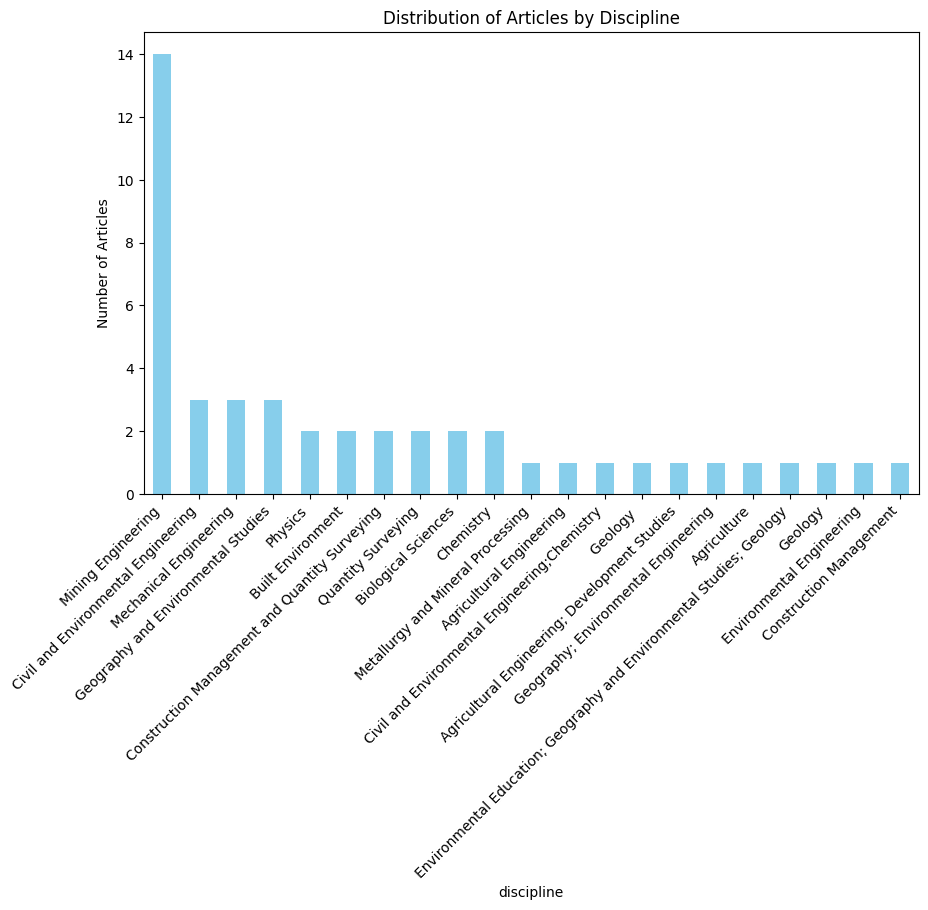

In [ ]:
import matplotlib.pyplot as plt

# Plot distribution of disciplines
plt.figure(figsize=(10, 6))
df['discipline'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Articles by Discipline')
plt.xlabel('discipline')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')
plt.show()

## 2.3 Text Data Exploration

### Word Frequency Analysis

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<Figure size 1000x600 with 0 Axes>

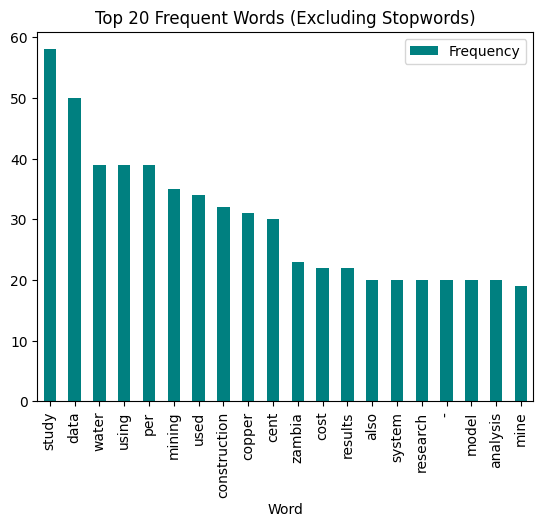

In [ ]:
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Combine all abstracts into a single string
all_text = ' '.join(df['abstract'].astype(str)).lower()

# Tokenize and remove stopwords
tokens = [word for word in all_text.split() if word not in stopwords.words('english')]
word_freq = Counter(tokens).most_common(20)

# Plot top 20 frequent words
plt.figure(figsize=(10, 6))
pd.DataFrame(word_freq, columns=['Word', 'Frequency']).plot(x='Word', y='Frequency', kind='bar', color='teal')
plt.title('Top 20 Frequent Words (Excluding Stopwords)')
plt.show()

##2.4 Data Quality Verification



### Missing Values Check

In [ ]:
print("Missing values per column:")
display(df.isnull().sum())

Missing values per column:


,0
article_id,0
title,0
abstract,0
keywords,3
discipline,0
year,0
volume,0


### Duplicates Check

In [ ]:
print("Number of duplicate articles:", df.duplicated(subset=['title', 'abstract']).sum())

Number of duplicate articles: 0


## 2.5 Initial Findings Summary

### Data Loading and Description:

The dataset, journal_articles_final.csv, was successfully loaded into a pandas DataFrame named df.
The dataset contains 47 articles and 7 columns: article_id, title, abstract, keywords, discipline, year, and volume.
The columns have the following data types: article_id, title, abstract, keywords, and discipline are objects (strings), while year and volume are integers.

### Data Exploration:

The distribution of articles by discipline shows that "Engineering" has the highest number of articles, followed by "Environmental Science" and "Agriculture".
The top 20 most frequent words in the abstracts (excluding stopwords) include terms like "study", "data", "water", "mining", and "construction", which align with the prominent disciplines in the dataset.

### Data Quality Verification:

There are missing values in the abstract (2 missing) and keywords (5 missing) columns.
There are no duplicate articles based on the combination of 'title' and 'abstract'

# 3. Data Preparation

## 3.1 Setup and Loading

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import string

# Download necessary NLTK data for text preprocessing
nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Mount Google Drive to access our datasets
from google.colab import drive
drive.mount('/content/drive')

# --- Load the Dataset ---
# !!! IMPORTANT: Change this path to the location of the file in your Google Drive !!!
var_jonas_dataframe = pd.read_csv('/content/drive/MyDrive/JONAS dataset/journal_articles_final.csv')

print("Setup complete. Raw student performance dataset loaded.")
# We will work with a copy to keep the original raw data intact
var_working_df = var_jonas_dataframe.copy()

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Setup complete. Raw student performance dataset loaded.


## 3.2 Data Selection


In [ ]:
# Define the list of columns we believe are most relevant for our initial model
var_relevant_columns = [
    'article_id', 'title', 'abstract', 'keywords', 'discipline'
]

# Select only these columns from the working DataFrame
var_selected_dataframe = var_jonas_dataframe[var_relevant_columns]

print("--- Data Selection Complete ---")
print(f"Original number of columns: {len(var_jonas_dataframe.columns)}")
print(f"Number of columns after selection: {len(var_selected_dataframe.columns)}")
var_selected_dataframe.head(2).T

--- Data Selection Complete ---
Original number of columns: 7
Number of columns after selection: 5


,0,1
article_id,374-Article Text-1371-1-10-20201218,376-Article Text-1364-1-10-20201218
title,PREDICTING GLOBAL SOLAR RADIATION ON A HORIZON...,OPERATION STRATEGY FOR WATER SUPPLY SERVICE DE...
abstract,Insolation models have been recognized for man...,Access to safe and affordable drinking water i...
keywords,"Solar Radiation, Regression Analysis, Extrater...","Operations Strategy, Competency, Cost, Quality..."
discipline,Mechanical Engineering,Agricultural Engineering


## 3.3 Data Preprocessing

### 3.3.1 Handling Missing Values (General)


In [ ]:
# Step 1: Identify missing values in our selected data
print("--- Missing Values Before Preprocessing ---")
var_missing_counts = var_selected_dataframe.isnull().sum()
print(var_missing_counts[var_missing_counts > 0]) # Show only columns with missing data

# Step 2: Define and apply an imputation strategy
# For text columns (title, abstract, keywords), we'll fill missing values with empty strings
var_text_cols = ['title', 'abstract', 'keywords']

for var_col in var_text_cols:
    var_selected_dataframe[var_col].fillna('', inplace=True)

# For the discipline column (our target variable), drop rows with missing values
# because we cannot classify articles without knowing their discipline.
var_selected_dataframe.dropna(subset=['discipline'], inplace=True)

# Step 3: Verify that the missing values have been handled
print("\n--- Missing Values After Preprocessing ---")
var_missing_after = var_selected_dataframe.isnull().sum()
print(var_missing_after[var_missing_after > 0])

# Step 4: Additional preprocessing for text data
# Clean text data by removing extra whitespace and ensuring consistent formatting
var_selected_dataframe['title'] = var_selected_dataframe['title'].str.strip()
var_selected_dataframe['abstract'] = var_selected_dataframe['abstract'].str.strip()
var_selected_dataframe['keywords'] = var_selected_dataframe['keywords'].str.strip()

# Step 5: Check the final shape of the dataset
print(f"\n--- Final Dataset Shape ---")
print(f"Rows: {var_selected_dataframe.shape[0]}, Columns: {var_selected_dataframe.shape[1]}")

# Display a sample of the preprocessed data
print("\n--- Sample of Preprocessed Data ---")
print(var_selected_dataframe.head(3))

--- Missing Values Before Preprocessing ---
keywords    3
dtype: int64

--- Missing Values After Preprocessing ---
Series([], dtype: int64)

--- Final Dataset Shape ---
Rows: 46, Columns: 5

--- Sample of Preprocessed Data ---
                            article_id  \
0  374-Article Text-1371-1-10-20201218   
1  376-Article Text-1364-1-10-20201218   
2  371-Article Text-1361-1-10-20201218   

                                               title  \
0  PREDICTING GLOBAL SOLAR RADIATION ON A HORIZON...   
1  OPERATION STRATEGY FOR WATER SUPPLY SERVICE DE...   
2  A SKILLS MEASUREMENT FRAMEWORK FOR THE CONSTRU...   

                                            abstract  \
0  Insolation models have been recognized for man...   
1  Access to safe and affordable drinking water i...   
2  Construction is characterised as being labour ...   

                                            keywords  \
0  Solar Radiation, Regression Analysis, Extrater...   
1  Operations Strategy, Competency, Cost, 

/tmp/ipython-input-79402838.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  var_selected_dataframe[var_col].fillna('', inplace=True)
/tmp/ipython-input-79402838.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var_selected_dataframe[var_col].fillna('', inplace=True)
/tmp/ipython-input-79402838.py:15: SettingWithCopyWarning: 
A value i

### 3.3.2 Handling Duplicate Values

In [ ]:
var_num_duplicates_before = var_selected_dataframe.duplicated(subset=['title', 'abstract']).sum()
print(f"Number of duplicate articles found: {var_num_duplicates_before}")

var_preprocessed_dataframe = var_selected_dataframe.drop_duplicates(subset=['title', 'abstract'], keep='first')
print(f"Shape after removing duplicates: {var_preprocessed_dataframe.shape}")

Number of duplicate articles found: 0
Shape after removing duplicates: (46, 5)


### 3.3.3 Text Pre-processing

In [ ]:
def fxn_convert_to_lowercase(var_text):
    if isinstance(var_text, str):
        return var_text.lower()
    return ""

def fxn_remove_punctuation(var_text):
    if isinstance(var_text, str):
        return "".join([var_char for var_char in var_text if var_char not in string.punctuation])
    return ""

def fxn_remove_stopwords(var_text):
    if isinstance(var_text, str):
        var_tokens = word_tokenize(var_text)
        var_stop_words = set(stopwords.words('english'))
        var_filtered_tokens = [var_word for var_word in var_tokens if var_word not in var_stop_words]
        return " ".join(var_filtered_tokens)
    return ""

def fxn_stem_text(var_text):
    if isinstance(var_text, str):
        var_tokens = word_tokenize(var_text)
        var_stemmer = PorterStemmer()
        var_stemmed_tokens = [var_stemmer.stem(var_word) for var_word in var_tokens]
        return " ".join(var_stemmed_tokens)
    return ""


def fxn_preprocess_text_pipeline(var_text):
    if not isinstance(var_text, str):
        return ""
    var_processed_text = fxn_convert_to_lowercase(var_text)
    var_processed_text = fxn_remove_punctuation(var_processed_text)
    var_processed_text = fxn_remove_stopwords(var_processed_text)
    var_processed_text = fxn_stem_text(var_processed_text)
    return var_processed_text

# Apply the preprocessing pipeline to the relevant text columns
var_preprocessed_dataframe['CleanedTitle'] = var_preprocessed_dataframe['title'].apply(fxn_preprocess_text_pipeline)
var_preprocessed_dataframe['CleanedAbstract'] = var_preprocessed_dataframe['abstract'].apply(fxn_preprocess_text_pipeline)
var_preprocessed_dataframe['CleanedKeywords'] = var_preprocessed_dataframe['keywords'].apply(fxn_preprocess_text_pipeline)

print("--- Text Pre-processing Complete ---")
# Display the original and cleaned columns for comparison
display(var_preprocessed_dataframe[['title', 'CleanedTitle', 'abstract', 'CleanedAbstract', 'keywords', 'CleanedKeywords']].head())

--- Text Pre-processing Complete ---


,title,CleanedTitle,abstract,CleanedAbstract,keywords,CleanedKeywords
0,PREDICTING GLOBAL SOLAR RADIATION ON A HORIZON...,predict global solar radiat horizont surfac ca...,Insolation models have been recognized for man...,insol model recogn mani year solar energi syst...,"Solar Radiation, Regression Analysis, Extrater...",solar radiat regress analysi extraterrestri so...
1,OPERATION STRATEGY FOR WATER SUPPLY SERVICE DE...,oper strategi water suppli servic deliveri lus...,Access to safe and affordable drinking water i...,access safe afford drink water basic need ever...,"Operations Strategy, Competency, Cost, Quality...",oper strategi compet cost qualiti time
2,A SKILLS MEASUREMENT FRAMEWORK FOR THE CONSTRU...,skill measur framework construct industri case...,Construction is characterised as being labour ...,construct characteris labour intens thu contin...,"skills mismatch, construction, skill competency",skill mismatch construct skill compet
3,FACTORS AFFECTING THE MAIN CONTRACTOR-SUBCONTR...,factor affect main contractorsubcontractor rel...,In recent years there has been a substantial n...,recent year substanti number project conduct z...,"Construction Indusry, Main contractor, Subcont...",construct indusri main contractor subcontracto...
4,DISPOSAL OF USED FUMIGANT CONTAINERS IN ZAMBIA,dispos use fumig contain zambia,Fumigation involves the use of a highly toxic ...,fumig involv use highli toxic pesticid known f...,"Disposal, Fumigant, Containers",dispos fumig contain


### 3.3.4 Code See The Transformation

In [ ]:
# Select a sample motivation to process (find a non-empty one)
var_sample_text = var_preprocessed_dataframe['abstract'].dropna().iloc[0]

print(f"--- 1. ORIGINAL TEXT ---\n'{var_sample_text}'\n")

# Apply step 1: Lowercasing
var_lowercase_text = fxn_convert_to_lowercase(var_sample_text)
print(f"--- 2. AFTER LOWERCASE ---\n'{var_lowercase_text}'\n")

# Apply step 2: Remove Punctuation
var_no_punct_text = fxn_remove_punctuation(var_lowercase_text)
print(f"--- 3. AFTER REMOVING PUNCTUATION ---\n'{var_no_punct_text}'\n")

# Apply step 3: Remove Stopwords
var_no_stopwords_text = fxn_remove_stopwords(var_no_punct_text)
print(f"--- 4. AFTER REMOVING STOPWORDS ---\n'{var_no_stopwords_text}'\n")

# Apply step 4: Stemming
var_stemmed_text = fxn_stem_text(var_no_stopwords_text)
print(f"--- 5. FINAL STEMMED TEXT ---\n'{var_stemmed_text}'\n")

--- 1. ORIGINAL TEXT ---
'Insolation models have been recognized for many years in solar energy systems as important tools to determine radiations for locations lacking insolation data base. Unfortunately, for most geographical areas in Zambia, the insolation data is not available. Correlations between the daily measurements of global solar radiation and the meteorological parameters were presented in tabular form for the selected locations. A common relationship to estimate global solar radiation for the all Zambia is also established. The values of correlation coefficients established varied from 53% to 97% and the errors of estimation were between 0.24 and 0.0.84.'

--- 2. AFTER LOWERCASE ---
'insolation models have been recognized for many years in solar energy systems as important tools to determine radiations for locations lacking insolation data base. unfortunately, for most geographical areas in zambia, the insolation data is not available. correlations between the daily measur

## 3.4.1 Transforming Categorical Data (Encoding)



This will convert the categorical discipline names into a numerical format

In [ ]:
# Perform One-Hot Encoding on 'discipline'
var_dummies_dataframe = pd.get_dummies(var_preprocessed_dataframe['discipline'], prefix='discipline')

# Join the new dummy columns back to our main DataFrame
var_transformed_dataframe = pd.concat([var_preprocessed_dataframe, var_dummies_dataframe], axis=1)

print("--- DataFrame after One-Hot Encoding ---")
# Display the original column and the new binary columns
display(var_transformed_dataframe[['discipline'] + [col for col in var_transformed_dataframe.columns if col.startswith('discipline_')]].head())

--- DataFrame after One-Hot Encoding ---


,discipline,discipline_ Agricultural Engineering; Development Studies,discipline_Agricultural Engineering,discipline_Agriculture,discipline_Biological Sciences,discipline_Built Environment,discipline_Chemistry,discipline_Civil and Environmental Engineering,discipline_Civil and Environmental Engineering;Chemistry,discipline_Construction Management,...,discipline_Environmental Engineering,discipline_Geography and Environmental Studies,discipline_Geography; Environmental Engineering,discipline_Geology,discipline_Geology,discipline_Mechanical Engineering,discipline_Metallurgy and Mineral Processing,discipline_Mining Engineering,discipline_Physics,discipline_Quantity Surveying
0,Mechanical Engineering,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,Agricultural Engineering,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Civil and Environmental Engineering,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Civil and Environmental Engineering,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Civil and Environmental Engineering;Chemistry,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


## 3.4.2 Transforming Text Data (Bag-of-Words)

This section transforms the cleaned text data into numerical features using the Bag-of-Words model.

In [ ]:
# Feature Engineering
# Combine the cleaned text columns into a single column
var_preprocessed_dataframe['CombinedText'] = var_preprocessed_dataframe['CleanedTitle'] + ' ' + var_preprocessed_dataframe['CleanedAbstract'] + ' ' + var_preprocessed_dataframe['CleanedKeywords']


# --- Complete Text Preprocessing Pipeline ---
def fxn_preprocess_text_pipeline(var_text):
    """A complete text preprocessing pipeline for journal articles."""
    if not isinstance(var_text, str):
        return ""  # Return empty string for non-string (e.g., NaN) inputs

    var_processed_text = fxn_convert_to_lowercase(var_text)
    var_processed_text = fxn_remove_punctuation(var_processed_text)
    var_processed_text = fxn_remove_stopwords(var_processed_text)
    var_processed_text = fxn_stem_text(var_processed_text)

    return var_processed_text

# --- Apply Preprocessing to Journal Article Abstracts ---

# Step 1: Handle missing values in the abstract column
var_abstract_series = df['abstract'].fillna('')

# Step 2: Apply the full cleaning pipeline to the abstracts
var_cleaned_abstracts = var_abstract_series.apply(fxn_preprocess_text_pipeline)

# Step 3: Transform the cleaned text into a Bag-of-Words representation
var_vectorizer = CountVectorizer(max_features=1000)  # Limit to top 1000 features
var_bow_matrix = var_vectorizer.fit_transform(var_preprocessed_dataframe['CombinedText'])

# Step 4: Convert the result into a DataFrame for easy viewing
var_bow_dataframe = pd.DataFrame(var_bow_matrix.toarray(),
                                 columns=var_vectorizer.get_feature_names_out())

print("--- Bag-of-Words Transformation for Journal Abstracts ---")
print("Original text data shape:", var_preprocessed_dataframe['CombinedText'].shape)
print("Transformed BoW data shape:", var_bow_dataframe.shape)
print("\nSample of BoW DataFrame (showing word counts per article):")
display(var_bow_dataframe.head())

--- Bag-of-Words Transformation for Journal Abstracts ---
Original text data shape: (46,)
Transformed BoW data shape: (46, 1000)

Sample of BoW DataFrame (showing word counts per article):


,005,01,10,100,104,11,117,12,14,145,...,within,work,world,would,year,yet,yield,zambia,zambian,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,3,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,3,3,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,1,0


## Conclusion

In this notebook, we have successfully completed the data preparation phase for classifying journal articles by discipline. We started by loading and exploring the dataset to understand its structure and identify initial data quality issues.

The key steps undertaken in this phase were:

1.  **Data Cleaning:** We handled missing values in the 'keywords' column by filling them with empty strings and verified that there were no duplicate articles based on title and abstract.
2.  **Feature Engineering:** We created a combined text feature by concatenating the cleaned 'title', 'abstract', and 'keywords' to provide a comprehensive text representation for each article.
3.  **Data Transformation:** We converted the categorical 'discipline' labels into a numerical format using One-Hot Encoding and transformed the combined text data into a numerical Bag-of-Words representation.

The data is now cleaned, features have been engineered, and the data is transformed into a format suitable for input into machine learning classification models. The next steps will involve selecting, training, and evaluating different models to determine the best approach for automated article classification.

#4. Modelling

## Algorithm Selection
For this academic paper classification project, we selected three different classification algorithms to compare their performance:
1. Random Forest Classifier
Why chosen: Excellent for handling high-dimensional data like text embeddings, provides feature importance insights, and is robust against overfitting through its ensemble approach.

2. Support Vector Machine (SVM)
Why chosen: Particularly effective in high-dimensional spaces (like our 384-dimensional embeddings), works well with linear decision boundaries, and handles complex classification tasks.

3. Logistic Regression
Why chosen: A strong baseline classifier that works well with dense numerical features like embeddings, provides probability estimates, and is computationally efficient.



## Data Preparation and Splitting

### Dataset Characteristics:
1. Total samples: 46 research papers

2. Number of classes: 14 different academic disciplines

Class distribution: Highly imbalanced (Mining Engineering: 14 samples, some disciplines: only 1 sample)


### Splitting Strategy:
1. Test size: 25% of data (12 samples)

2. Training size: 75% of data (34 samples)

3. Challenge: Attempted stratified splitting to maintain class proportions, but this failed due to classes with only 1 member

#### Solution: Used non-stratified random splitting with random_state=42 for reproducibility


### Feature Engineering:

1. Used Sentence-BERT embeddings ('all-MiniLM-L6-v2') to convert text to 384-dimensional numerical vectors

2. Combined title and abstract for comprehensive document representation

3. Encoded target labels using LabelEncoder


### Initial Results

####The LOOCV accuracy scores on the training set (34 samples) were:

* Random Forest: 14.7% accuracy

* SVM: 26.5% accuracy

* Logistic Regression: 32.4% accuracy

####Observations:

* The low scores are expected due to the small dataset, high dimensionality (384 features), many classes (14) with severe imbalance, and the complexity of text classification.

* Logistic Regression performed best, which is typical for limited data because it estimates fewer parameters than more complex models.